In [20]:
%matplotlib inline
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.core.protobuf.config_pb2 import ConfigProto
from tensorflow.python.client.session import Session
from tensorflow.python.keras.backend import set_session
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import numpy as np
from matplotlib import pyplot as plt

from cgan_model import build_cgan_discriminator, build_cgan_generator, build_cgan
from dataset_utils import load_all_imgs

In [2]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
set_session(Session(config=config))

2021-10-01 14:05:20.411300: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 14:05:20.473305: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 14:05:20.477031: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 14:05:20.477277: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [3]:
img_rows = 64
img_cols = 64
channels = 3

img_shape = (img_rows, img_cols, channels)

z_dim = 100

num_classes = 4
classes = {'healthy': 0, 'mild': 1, 'moderate': 2, 'severe': 3}

# Definindo os modelos

In [4]:
discriminator = build_cgan_discriminator(img_shape, num_classes)
discriminator.compile(optimizer='sgd', loss=CategoricalCrossentropy(), metrics=['accuracy'])
# Build the Generator
generator = build_cgan_generator(z_dim, num_classes)

# Keep Discriminator’s parameters constant for Generator training
discriminator.trainable = False

# Build and compile CGAN model with fixed Discriminator to train the Generator
cgan = build_cgan(generator, discriminator, z_dim)
cgan.compile(loss='categorical_crossentropy', optimizer=Adam())

2021-10-01 14:05:20.822068: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 14:05:20.822307: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 14:05:20.822560: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 14:05:20.823037: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 14:05:20.823209: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [23]:
plot_model(discriminator)
discriminator.summary()

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 12288)     49152       input_2[0][0]                    
__________________________________________________________________________________________________
flatten (Flatten)               (None, 12288)        0           embedding[0][0]                  
__________________________________________________________________________________________________
input_1 (InputLayer)   

In [6]:
generator.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 100)       400         input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 100)          0           embedding_1[0][0]                
____________________________________________________________________________________________

In [7]:
labels_pred = np.array([0,1,3,4])
z = np.random.normal(0, 1, (4, z_dim))

In [8]:
gen_imgs = generator.predict([z, labels_pred])

2021-10-01 14:05:21.197103: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-01 14:05:21.764177: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204


In [9]:
gen_imgs.shape

(4, 64, 64, 3)

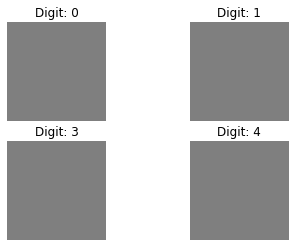

In [10]:
fig, axs = plt.subplots(2, 2, )

cnt = 0
for i in range(2):
    for j in range(2):
        # Output a grid of images
        img = (gen_imgs[cnt] + 1) / 2.0
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
        axs[i, j].set_title("Digit: %d" % labels_pred[cnt])
        cnt += 1

In [11]:
imgs, labels = load_all_imgs('./dataset/dataset_64x64', classes, (64,64))


./dataset/dataset_64x64 found 6194 img to load

[0]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[100]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[200]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[300]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[400]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[500]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[600]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[700]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[800]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [12]:
idx = np.random.randint(0, imgs.shape[0], 4)
load_imgs, load_labels = imgs[idx], labels[idx]

In [13]:
result = discriminator.predict([load_imgs, load_labels])

In [14]:
result

array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

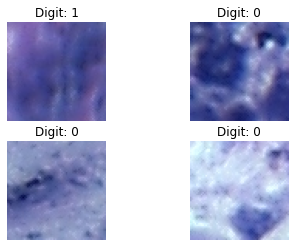

In [15]:
fig, axs = plt.subplots(2, 2, )

cnt = 0
for i in range(2):
    for j in range(2):
        # Output a grid of images
        img = (load_imgs[cnt] + 1) / 2.0
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
        axs[i, j].set_title("Digit: %d" % load_labels[cnt])
        cnt += 1

In [16]:
real = np.ones((4, 1))
result = discriminator.train_on_batch([load_imgs, load_labels], real)

In [17]:
result

[0.0, 1.0]

In [18]:
result = discriminator.predict([load_imgs, load_labels])

In [19]:
result

array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)